In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set(style="whitegrid")

In [39]:
df = pd.read_csv("Student_Performance_Data_Set.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [40]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [41]:
for col in df.columns:
    print(f"{col}:")
    print(" - Unique:", df[col].nunique())
    print(" - Nulls:", df[col].isnull().sum())
    print(" - Type:", df[col].dtype)
    print()

school:
 - Unique: 2
 - Nulls: 0
 - Type: object

sex:
 - Unique: 2
 - Nulls: 0
 - Type: object

age:
 - Unique: 8
 - Nulls: 0
 - Type: int64

address:
 - Unique: 2
 - Nulls: 0
 - Type: object

famsize:
 - Unique: 2
 - Nulls: 0
 - Type: object

Pstatus:
 - Unique: 2
 - Nulls: 0
 - Type: object

Medu:
 - Unique: 5
 - Nulls: 0
 - Type: int64

Fedu:
 - Unique: 5
 - Nulls: 0
 - Type: int64

Mjob:
 - Unique: 5
 - Nulls: 0
 - Type: object

Fjob:
 - Unique: 5
 - Nulls: 0
 - Type: object

reason:
 - Unique: 4
 - Nulls: 0
 - Type: object

guardian:
 - Unique: 3
 - Nulls: 0
 - Type: object

traveltime:
 - Unique: 4
 - Nulls: 0
 - Type: int64

studytime:
 - Unique: 4
 - Nulls: 0
 - Type: int64

failures:
 - Unique: 4
 - Nulls: 0
 - Type: int64

schoolsup:
 - Unique: 2
 - Nulls: 0
 - Type: object

famsup:
 - Unique: 2
 - Nulls: 0
 - Type: object

paid:
 - Unique: 2
 - Nulls: 0
 - Type: object

activities:
 - Unique: 2
 - Nulls: 0
 - Type: object

nursery:
 - Unique: 2
 - Nulls: 0
 - Type: object



In [42]:
df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


In [43]:
for col in ['G1', 'G2', 'G3']:
    print(f"{col} - Five Number Summary:")
    print("Min:", df[col].min())
    print("Q1 :", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("Q3 :", df[col].quantile(0.75))
    print("Max:", df[col].max())
    print()

G1 - Five Number Summary:
Min: 0
Q1 : 10.0
Median: 11.0
Q3 : 13.0
Max: 19

G2 - Five Number Summary:
Min: 0
Q1 : 10.0
Median: 11.0
Q3 : 13.0
Max: 19

G3 - Five Number Summary:
Min: 0
Q1 : 10.0
Median: 12.0
Q3 : 14.0
Max: 19



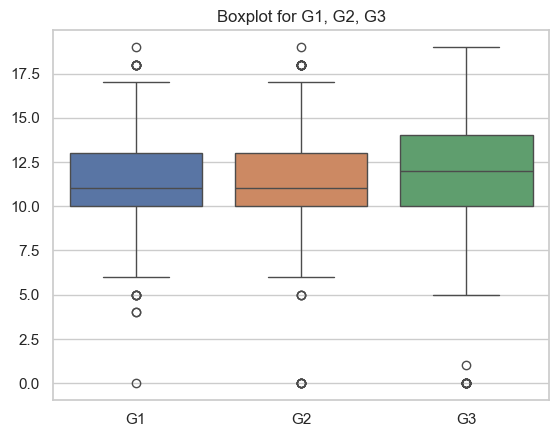

In [44]:
sns.boxplot(data=df[['G1', 'G2', 'G3']])
plt.title("Boxplot for G1, G2, G3")
plt.show()

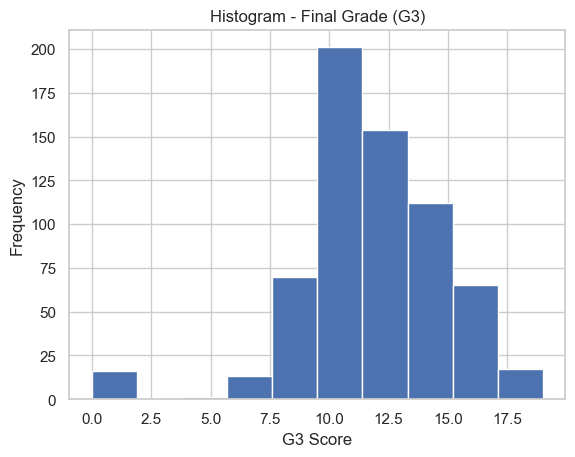

In [45]:
df['G3'].hist(bins=10)
plt.title("Histogram - Final Grade (G3)")
plt.xlabel("G3 Score")
plt.ylabel("Frequency")
plt.show()

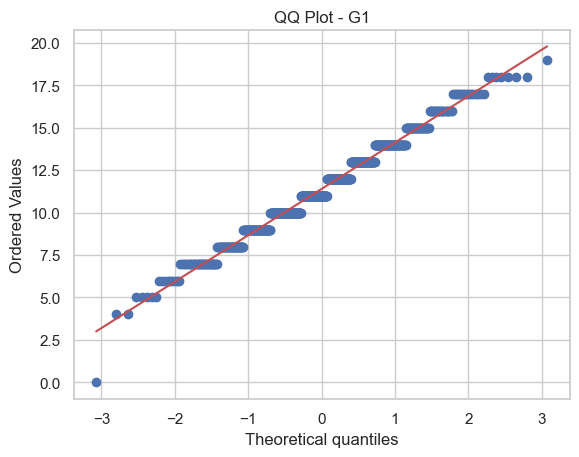

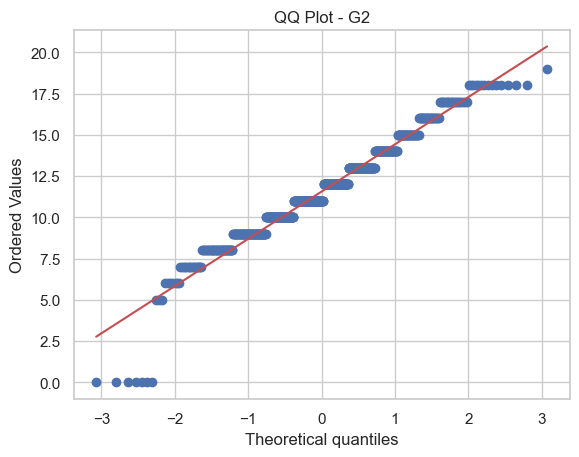

In [46]:
stats.probplot(df['G1'], dist="norm", plot=plt)
plt.title("QQ Plot - G1")
plt.show()

stats.probplot(df['G2'], dist="norm", plot=plt)
plt.title("QQ Plot - G2")
plt.show()

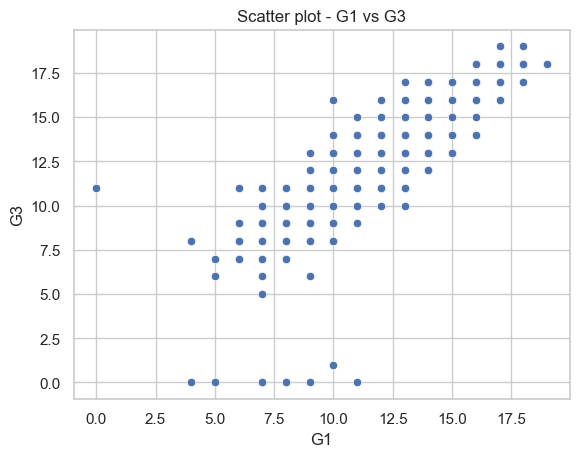

In [47]:
sns.scatterplot(x='G1', y='G3', data=df)
plt.title("Scatter plot - G1 vs G3")
plt.show()

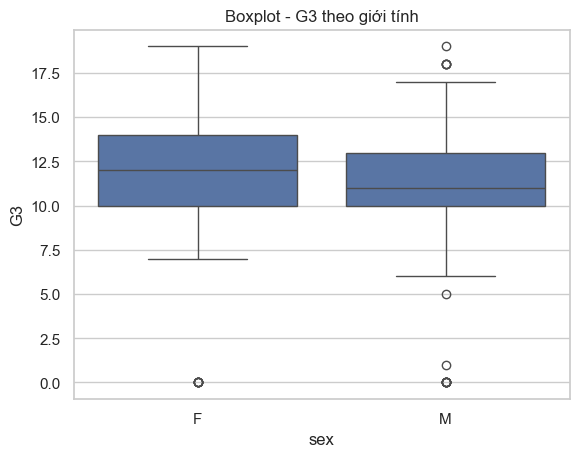

In [48]:
sns.boxplot(x='sex', y='G3', data=df)
plt.title("Boxplot - G3 theo giới tính")
plt.show()

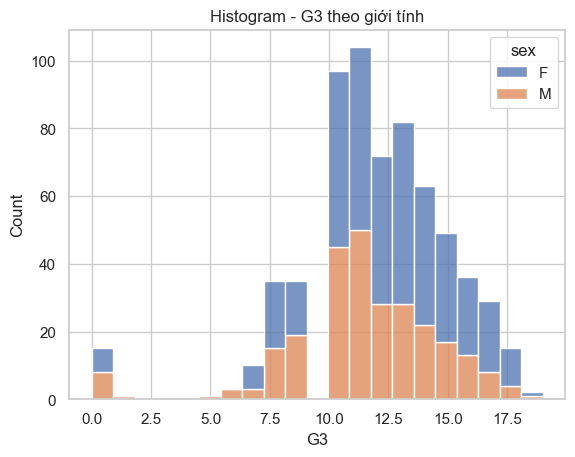

In [49]:
sns.histplot(data=df, x='G3', hue='sex', multiple='stack')
plt.title("Histogram - G3 theo giới tính")
plt.show()

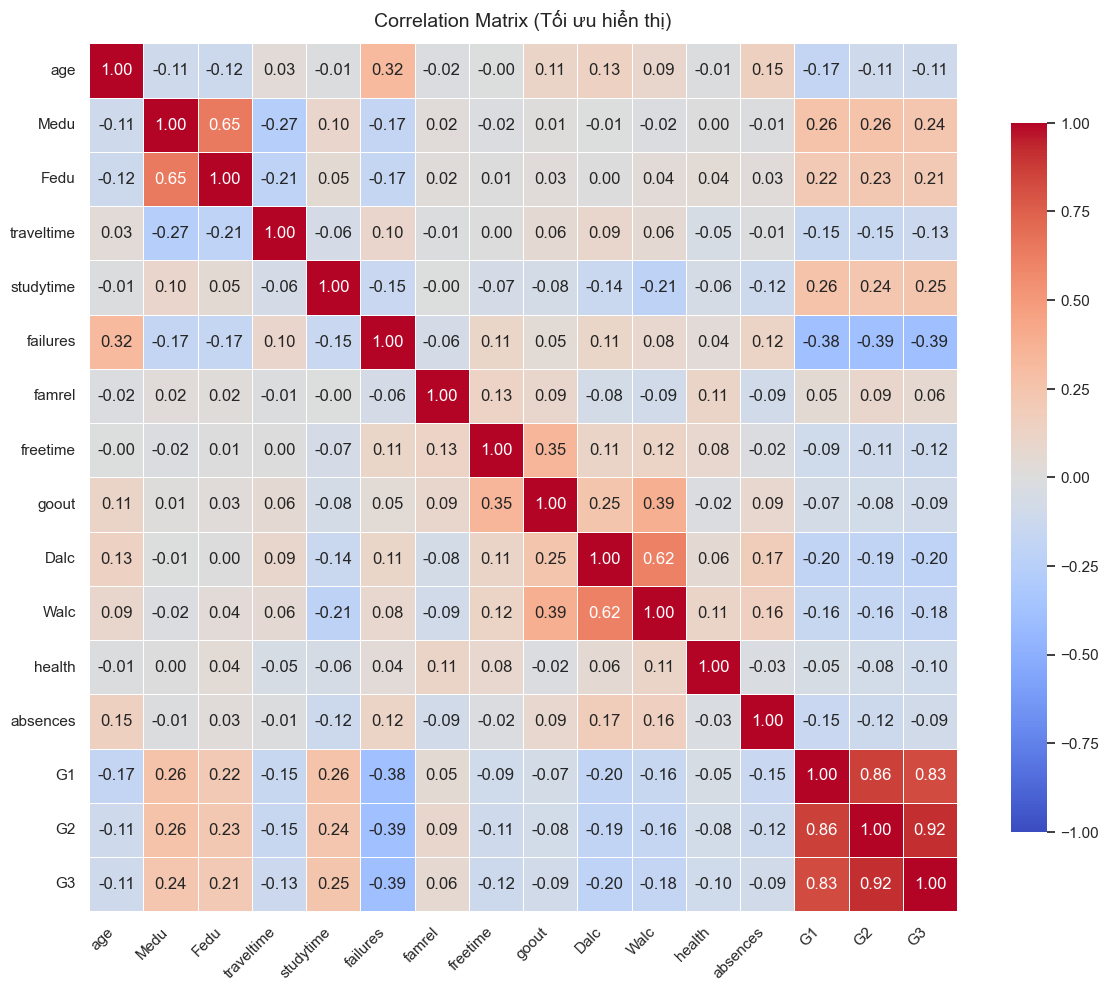

In [50]:

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Tính toán ma trận tương quan
corr_matrix = numeric_cols.corr()

# Thiết lập kích thước đồ thị
plt.figure(figsize=(12, 10))

# Vẽ heatmap
sns.heatmap(corr_matrix, 
            annot=True,          # Hiển thị số
            fmt=".2f",           # Làm tròn 2 chữ số sau dấu phẩy
            cmap="coolwarm",     # Bảng màu
            vmin=-1, vmax=1,     # Giới hạn từ -1 đến 1
            square=True,         # Ô vuông đều
            linewidths=0.5,      # Đường ngăn ô
            cbar_kws={"shrink": 0.8})  # Thu nhỏ thanh màu

plt.title("Correlation Matrix (Tối ưu hiển thị)", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
sample_data = df.loc[:3, ['G1', 'G2', 'G3', 'studytime']]
cos_sim = cosine_similarity(sample_data)
pd.DataFrame(cos_sim, index=['Row1', 'Row2', 'Row3', 'Row4'], columns=['Row1', 'Row2', 'Row3', 'Row4'])

,Row1,Row2,Row3,Row4
Row1,1.000000,0.867349,0.828488,0.819360
Row2,0.867349,1.000000,0.996751,0.995845
Row3,0.828488,0.996751,1.000000,0.998835
Row4,0.819360,0.995845,0.998835,1.000000


In [52]:
df.groupby('sex')['G3'].mean()


sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

In [53]:
df.groupby('studytime')['G3'].agg(['mean', 'count'])


,mean,count
studytime,,
1,10.844340,212
2,12.091803,305
3,13.226804,97
4,13.057143,35


In [54]:
fail_rate = df[df['failures'] > 0].groupby('sex').size() / df.groupby('sex').size()
fail_rate

sex
F    0.140992
M    0.172932
dtype: float64

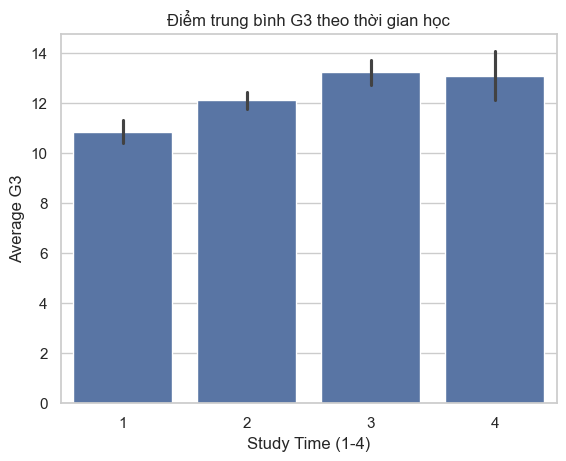

In [55]:
sns.barplot(x='studytime', y='G3', data=df, estimator=np.mean)
plt.title("Điểm trung bình G3 theo thời gian học")
plt.xlabel("Study Time (1-4)")
plt.ylabel("Average G3")
plt.show()

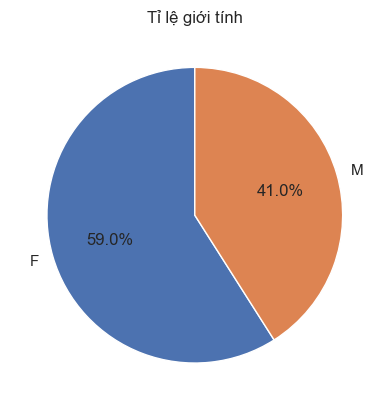

In [56]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Tỉ lệ giới tính")
plt.ylabel("")
plt.show()

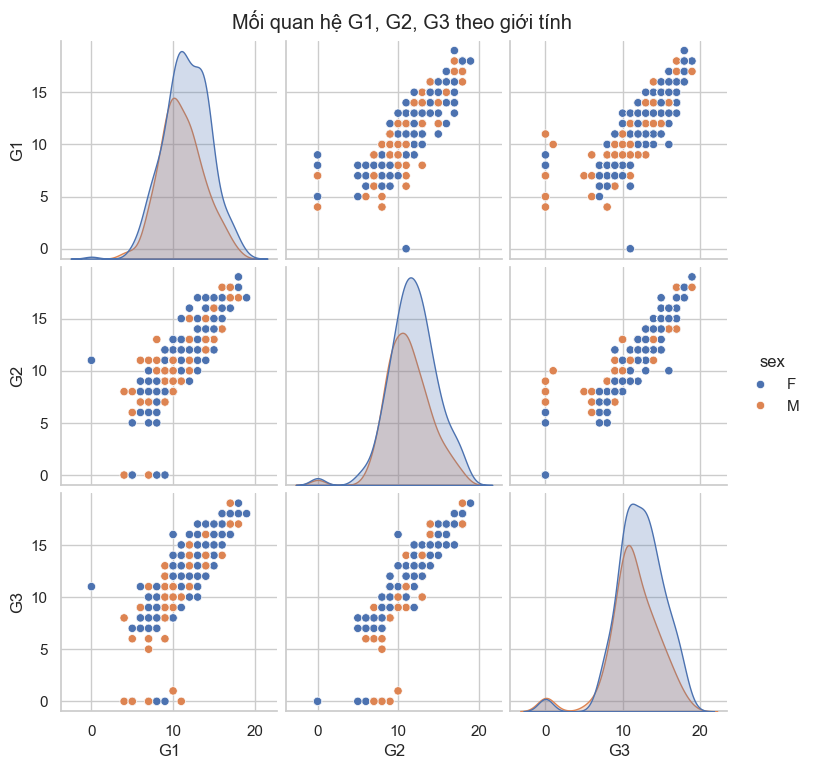

In [57]:
sns.pairplot(df, vars=['G1', 'G2', 'G3'], hue='sex')
plt.suptitle("Mối quan hệ G1, G2, G3 theo giới tính", y=1.02)
plt.show()

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['G1', 'G2', 'G3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

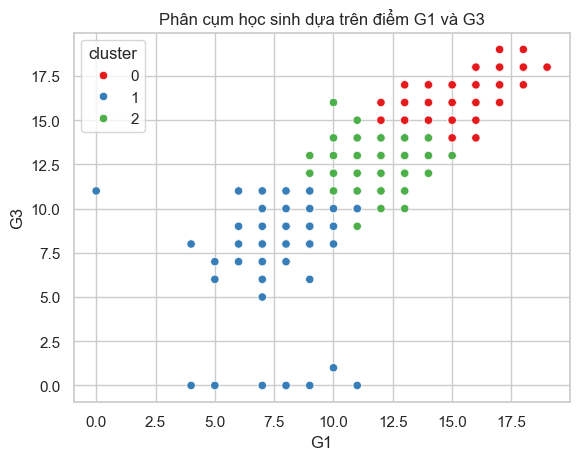

In [60]:
sns.scatterplot(x='G1', y='G3', hue='cluster', data=df, palette='Set1')
plt.title("Phân cụm học sinh dựa trên điểm G1 và G3")
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['G1', 'G2', 'G3']]
y = df['sex']  # phân loại giới tính

# Mã hóa nhãn
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Độ chính xác: 0.5846153846153846
Confusion Matrix:
 [[83 38]
 [43 31]]


In [62]:
# Dự đoán xác suất (predict_proba)
y_proba = clf.predict_proba(X_test)[:, 1]  # Xác suất class = 1 (nữ nếu label là 1)

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

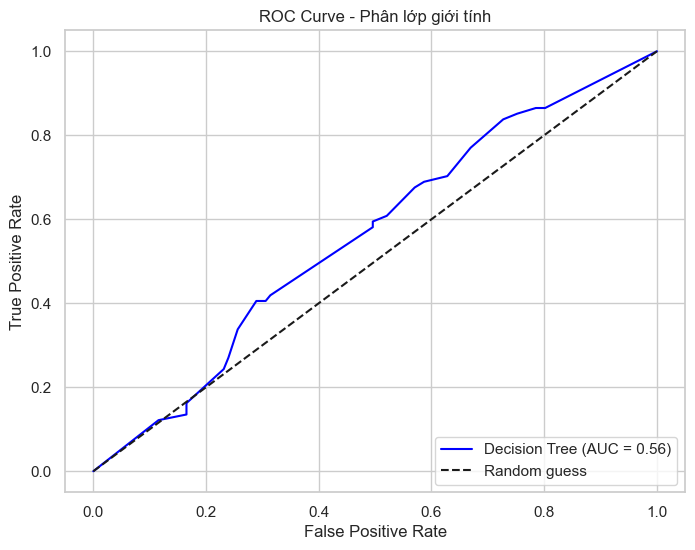

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Phân lớp giới tính")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()